# Low Pass Filter design


$$
H(S) = \frac{1}{\frac{s}{\omega_0} + 1}
$$

$$
H(S) = \frac{\omega_0^2}{s^2 + \frac{\omega_0}{Q}s + \omega_0^2}
$$

In [4]:
import numpy as np
import pandas as pd
import os
import sys
import pyradi.ryplot as ryplot
%matplotlib inline

1-pole fc=0.1 (0,1,1.5915494309189535,1)
1-pole fc=3 (0,1,0.05305164769729845,1)
2-pole fc=1 Q=1 (0,0,39.47841760435743,1,6.283185307179586,39.47841760435743)
2-pole fc=0.5 Q=1 (0,0,9.869604401089358,1,3.141592653589793,9.869604401089358)
2-pole fc=0.1 Q=1 (0,0,0.3947841760435743,1,0.6283185307179586,0.3947841760435743)


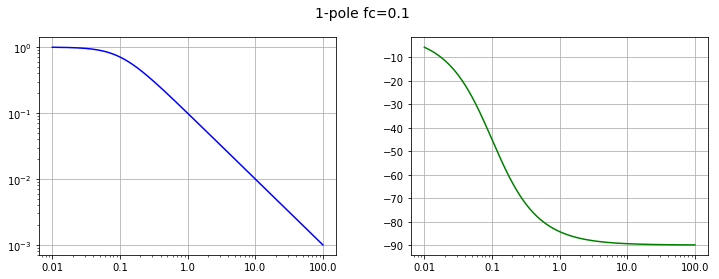

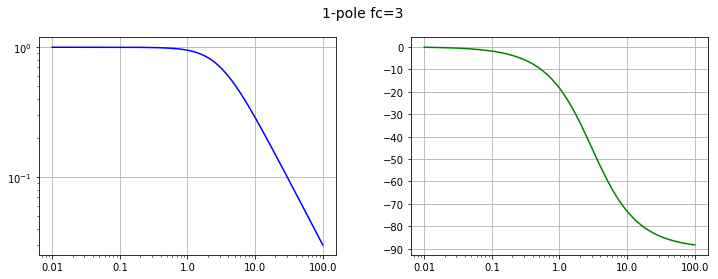

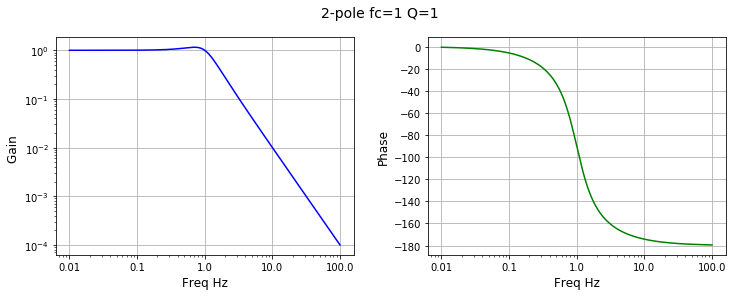

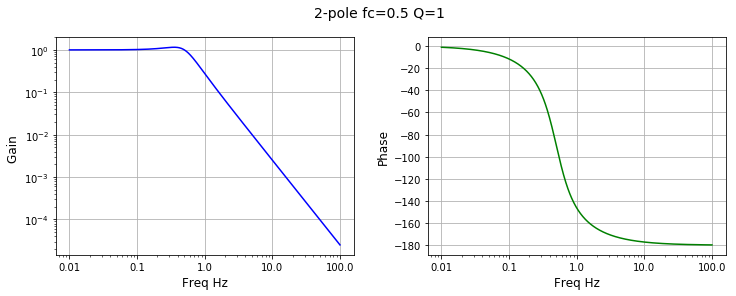

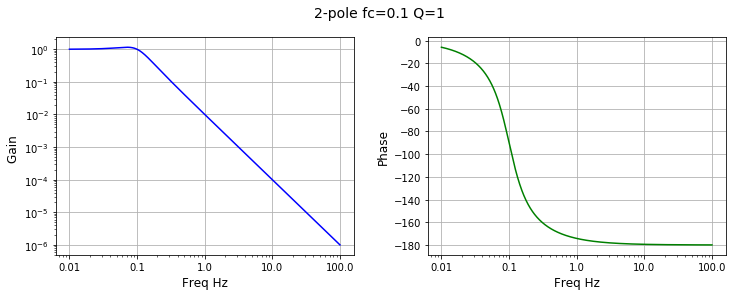

In [5]:
def LPfilt1(freqc,freq,iplt=0):
    c = 0
    d = 1
    a =  1/(2*np.pi*freqc)
    b = 1
    angf = freq * 2 * np.pi * 1j
    resp = (c * angf + d) / (a * angf + b)
    mag = np.abs(resp)
    phase = np.angle(resp,deg=True)
    rstr = f'1-pole fc={freqc} ({c},{d},{a},{b})'
    iplt += 1
    q = ryplot.Plotter(iplt,1,2,f'1-pole fc={freqc}',figsize=(12,4))
    q.logLog(1,freq,mag)
    q.semilogX(2,freq,phase);
    return iplt,c,d,a,b,rstr
    
def LPfilt2(freqc,Q,freq,iplt=0):
    omegac = 2 * np.pi * freqc
    m = 0
    c = 0
    d = omegac**2
    n = 1
    a = omegac / Q
    b = omegac**2
    rstr = f'2-pole fc={freqc} Q={Q} ({m},{c},{d},{n},{a},{b})'
    angf = freq * 2 * np.pi * 1j
    resp = (m * angf**2 + c * angf + d) / (n * angf**2 + a * angf + b)
    mag = np.abs(resp)
    phase = np.angle(resp,deg=True)
    iplt += 1
    r = ryplot.Plotter(iplt,1,2,f'2-pole fc={freqc} Q={Q}',figsize=(12,4))
    r.logLog(1,freq,mag,'','Freq Hz', 'Gain ')
    r.semilogX(2,freq,phase,'','Freq Hz','Phase');  
    return iplt,m,c,d,n,a,b,rstr
    

freq = np.logspace(-2,2,1000)

iplt = 10
iplt,c,d,a,b,rstr = LPfilt1(freqc=.1,freq=freq,iplt=iplt)
print(rstr)
iplt,c,d,a,b,rstr = LPfilt1(freqc=3,freq=freq,iplt=iplt)
print(rstr)
iplt,m,c,d,n,a,b,rstr = LPfilt2(freqc=1, Q=1, freq=freq,iplt=iplt)
print(rstr)
iplt,m,c,d,n,a,b,rstr = LPfilt2(freqc=0.5, Q=1, freq=freq,iplt=iplt)
print(rstr)
iplt,m,c,d,n,a,b,rstr = LPfilt2(freqc=0.1, Q=1, freq=freq,iplt=iplt)
print(rstr)


